# Bird Classification Project P4 - Predictive Modelling

Natasha, Priyanka, Sadik

Imports

In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

import warnings
warnings.filterwarnings('ignore')


## Importing Dataset 20 Birds Species

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

def unzip_folder(zip_path, extract_path):

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)


In [ ]:
zip_file_path = '/content/drive/MyDrive/20-bird-species.zip'
extract_to_path = '/content/drive/MyDrive/Project4'

unzip_folder(zip_file_path, extract_to_path)

In [ ]:
train_path="/content/drive/MyDrive/Project4/20-bird-species/Train"
test_path = "/content/drive/MyDrive/Project4/20-bird-species/Test"
valid_path = "/content/drive/MyDrive/Project4/20-bird-species/Valid"

## Creating DataFame with filepath and bird classes

In [2]:
import sys,os
from pathlib import Path

In [3]:
train_path="./data/20-bird-species/Train"
test_path = "./data/20-bird-species/Test"
valid_path = "./data/20-bird-species/Valid"

In [4]:
birds = np.array(list(os.listdir(train_path)))

idx_to_name = {i:x for (i,x) in enumerate(birds)}
name_to_idx = {x:i for (i,x) in enumerate(birds)}
print(idx_to_name)

{0: 'VARIED THRUSH', 1: 'VENEZUELIAN TROUPIAL', 2: 'VERMILION FLYCATHER', 3: 'VICTORIA CROWNED PIGEON', 4: 'VIOLET GREEN SWALLOW', 5: 'VULTURINE GUINEAFOWL', 6: 'WALL CREAPER', 7: 'WATTLED CURASSOW', 8: 'WHIMBREL', 9: 'WHITE BROWED CRAKE', 10: 'WHITE CHEEKED TURACO', 11: 'WHITE NECKED RAVEN', 12: 'WHITE TAILED TROPIC', 13: 'WHITE THROATED BEE EATER', 14: 'WILD TURKEY', 15: 'WILSONS BIRD OF PARADISE', 16: 'WOOD DUCK', 17: 'YELLOW BELLIED FLOWERPECKER', 18: 'YELLOW CACIQUE', 19: 'YELLOW HEADED BLACKBIRD'}


In [5]:
def process(data):
    path=Path(data)
    filepaths=list(path.glob(r"**/*.jpg"))
    labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
    df1=pd.Series(filepaths,name='filepaths').astype(str)
    df2=pd.Series(labels,name='labels')
    df=pd.concat([df1,df2],axis=1)
    return df

In [6]:
df_train=process(train_path)

df_test=process(test_path)

df_valid=process(valid_path)

In [7]:
df_train.head()

,filepaths,labels
0,data\20-bird-species\Train\VARIED THRUSH\001.jpg,VARIED THRUSH
1,data\20-bird-species\Train\VARIED THRUSH\002.jpg,VARIED THRUSH
2,data\20-bird-species\Train\VARIED THRUSH\003.jpg,VARIED THRUSH
3,data\20-bird-species\Train\VARIED THRUSH\004.jpg,VARIED THRUSH
4,data\20-bird-species\Train\VARIED THRUSH\005.jpg,VARIED THRUSH


In [8]:
df_test.head()

,filepaths,labels
0,data\20-bird-species\Test\VARIED THRUSH\001.jpg,VARIED THRUSH
1,data\20-bird-species\Test\VARIED THRUSH\002.jpg,VARIED THRUSH
2,data\20-bird-species\Test\VARIED THRUSH\003.jpg,VARIED THRUSH
3,data\20-bird-species\Test\VARIED THRUSH\004.jpg,VARIED THRUSH
4,data\20-bird-species\Test\VARIED THRUSH\005.jpg,VARIED THRUSH


In [9]:
df_train.shape , df_test.shape, df_valid.shape

((3217, 2), (3217, 2), (3217, 2))

In [10]:
from tensorflow import keras
keras.backend.clear_session()

## Data Augmentation

Data augmentation is a technique in machine learning used to reduce overfitting when training a machine learning model by training models on several slightly-modified copies of existing data.
(https://en.wikipedia.org/wiki/Data_augmentation)


In [11]:
from keras.preprocessing.image import ImageDataGenerator


In [12]:
#Performing data augmentation on datasets

#defining parameters
datagen = ImageDataGenerator(
        rescale=1./255, #rescales the pixel between 0 and 1
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#applying defined datagen parameters to the training dataset.
train_generator = datagen.flow_from_dataframe(
    df_train,
    directory=None,
    x_col='filepaths',
    y_col='labels',
    weight_col=None,
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    directory=None,
    x_col='filepaths',
    y_col='labels',
    weight_col=None,
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32
)


valid_generator = datagen.flow_from_dataframe(
    df_valid,
    directory=None,
    x_col='filepaths',
    y_col='labels',
    weight_col=None,
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32
)


Found 3217 validated image filenames belonging to 20 classes.
Found 3217 validated image filenames belonging to 20 classes.
Found 3217 validated image filenames belonging to 20 classes.


# Defining the CNN Model

In [13]:
input_shape = (128, 128, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(20, activation="softmax"),
    ]
)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dropout (Dropout)           (None, 57600)             0

In [15]:
#Compile before fitting

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Justification for the parameters used
---



We chose you use the ReLU activation function: (Rectified Linear Activation)
This is the most common activation function used as it's simple, computationally efficient, and avoids the vanishing gradient problem.
Usage: It is often used as the activation function for hidden layers in CNNs.
Loss Function

We are using teh categorical crossentropy as this is a multi-class classification problem as we are predicting for 20 classes.

Optimizer Choice

Adam: Adam (Adaptive Moment Estimation) is one of the most widely used optimizers for deep learning, including image-related tasks. It combines the benefits of both AdaG rad and RMSprop by using adaptive learning rates and momentum. Adam often converges quickly and works well for a wide range of problems.




---




In [16]:
#fitting the train_generator and valid_generator (augmented data)

model.fit(
        train_generator,
        epochs=13,
        validation_data= valid_generator)

Epoch 1/13
101/101 [==============================] - 100s 992ms/step - loss: 2.3524 - accuracy: 0.3053 - val_loss: 1.5164 - val_accuracy: 0.5592
Epoch 2/13
101/101 [==============================] - 89s 879ms/step - loss: 1.3217 - accuracy: 0.6142 - val_loss: 1.1068 - val_accuracy: 0.6727
Epoch 3/13
101/101 [==============================] - 102s 1s/step - loss: 1.0326 - accuracy: 0.7000 - val_loss: 0.8766 - val_accuracy: 0.7495
Epoch 4/13
101/101 [==============================] - 95s 945ms/step - loss: 0.8570 - accuracy: 0.7541 - val_loss: 0.7306 - val_accuracy: 0.7917
Epoch 5/13
101/101 [==============================] - 108s 1s/step - loss: 0.7559 - accuracy: 0.7802 - val_loss: 0.6454 - val_accuracy: 0.8141
Epoch 6/13
101/101 [==============================] - 96s 954ms/step - loss: 0.6655 - accuracy: 0.8070 - val_loss: 0.5231 - val_accuracy: 0.8480
Epoch 7/13
101/101 [==============================] - 96s 949ms/step - loss: 0.5556 - accuracy: 0.8346 - val_loss: 0.4640 - val_accur

# Why epochs= 13?



1.   First Approach: Epoch = 10
> Val Accuracy was 90% (approx)


2.   Second Approach: Epoch = 15
> The Val accuracy decreased and Val Loss increased after epochs = 13

model.fit results at epochs = 15

Epoch 12/15
101/101 [==============================] - 148s 1s/step - loss: 0.3835 - accuracy: 0.8921 - val_loss: 0.2857 - val_accuracy: 0.9164

**Epoch 13/15
101/101 [==============================] - 146s 1s/step - loss: 0.3388 - accuracy: 0.8931 - val_loss: 0.2280 - val_accuracy: 0.9363**

Epoch 14/15
101/101 [==============================] - 182s 2s/step - loss: 0.3536 - accuracy: 0.8906 - val_loss: 0.2428 - val_accuracy: 0.9301

Epoch 15/15
101/101 [==============================] - 185s 2s/step - loss: 0.3151 - accuracy: 0.9021 - val_loss: 0.2634 - val_accuracy: 0.9270




In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

101/101 [==============================] - 36s 354ms/step - loss: 0.2567 - accuracy: 0.9254
Test Loss: 0.2566676139831543
Test Accuracy: 0.9253963232040405


# Saving the model https://www.tensorflow.org/guide/keras/serialization_and_saving

In [19]:
model.save('my_model.keras')

# Loading Images from Validation Folder

In [25]:
from PIL import Image

directory = valid_path
def show_images(directory):
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))
    axes = axes.flatten()

    for i, folder in enumerate(os.listdir(directory)):
        folder_path = os.path.join(directory,folder)

        if os.path.isdir(folder_path):
            image_file =[file for file in os.listdir(folder_path) if file.lower().endswith(('jpg'))]

            if image_file:
                image_path = os.path.join(folder_path, image_file[0])
                img = Image.open(image_path)

                axes[i].imshow(img)
                axes[i].set_title(folder)
                axes[i].axis('off')


    plt.show()


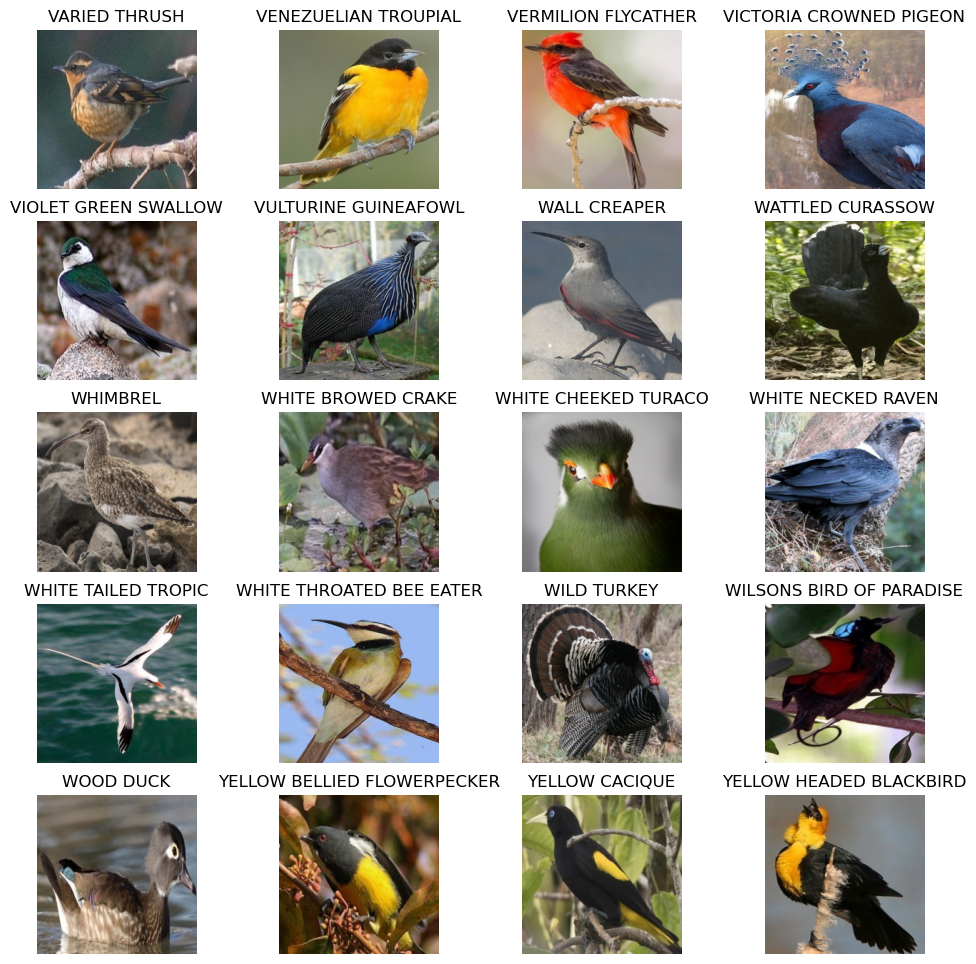

In [26]:
show_images(directory)

# Loading the Model

https://www.tensorflow.org/tutorials/keras/save_and_load

In [28]:
loaded_model = keras.models.load_model('my_model.keras')

In [29]:
validation_loss, validation_accuracy = loaded_model.evaluate(valid_generator)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

101/101 [==============================] - 31s 308ms/step - loss: 0.2501 - accuracy: 0.9297
Validation Loss: 0.25005173683166504
Validation Accuracy: 0.9297482371330261
